## Polynomial Regression

Sometimes our data cannot be separated by a straight line passing through it(Linear Regression). In those cases, we use a method called Polynomial Regression which in essence adds more features to a particular feature vector,X. 

Let's assume we have one feature for now. If we wish to fit a polynomial of degree = n onto the data, then the PolynomialFeatures() function that we use to transform the feature vector, will take in the value n along with the feature vector and return it with each  feature value in it now replaced by an array of powers of that feature value from 0 to n. For example, take the following

$
\begin{bmatrix}
    2.\\
    2.4\\
    1.5\\
    \vdots
\end{bmatrix}
$
$\longrightarrow$
$
\begin{bmatrix}
    [ 1 & 2. & 4.]\\
    [ 1 & 2.4 & 5.76]\\
    [ 1 & 1.5 & 2.25]\\
    \vdots & \vdots & \vdots\\
\end{bmatrix}
$

The feature vector on the left,say X gets transformed into the feature vector on the right, say X1 after applying the PolynomialFeatures() function on X with the degree parameter set to 2.

## Importing Packages

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

## Reading the data

In [3]:
df = pd.read_csv("FuelConsumption.csv")

In [4]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## Selecting Feature- ENGINESIZE to predict CO2EMISSIONS

In [5]:
cdf = df[['ENGINESIZE','CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CO2EMISSIONS
0,2.0,196
1,2.4,221
2,1.5,136
3,3.5,255
4,3.5,244


### Plotting ENGINESIZE against CO2EMISSIONS

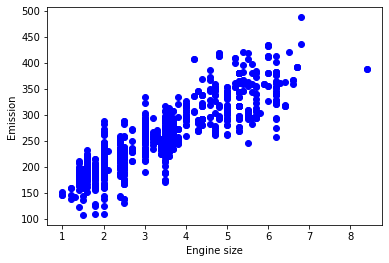

In [6]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

## Splitting the dataset into training and test datasets

In [7]:
from sklearn.model_selection import train_test_split

X=cdf[['ENGINESIZE']]
y=cdf[['CO2EMISSIONS']]
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
X_train

,ENGINESIZE
409,1.5
773,1.8
146,3.6
776,5.5
381,5.0
...,...
456,5.3
360,2.0
709,2.0
439,5.3


## Transforming the data

In [8]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_train_poly

array([[ 1.  ,  1.5 ,  2.25],
       [ 1.  ,  1.8 ,  3.24],
       [ 1.  ,  3.6 , 12.96],
       ...,
       [ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  5.3 , 28.09],
       [ 1.  ,  6.2 , 38.44]])

## Building the Model and training it

In [13]:
from sklearn import linear_model

regr = linear_model.LinearRegression().fit(X_train_poly, y_train)

X_test_poly = poly.fit_transform(X_test)
y_test_poly = regr.predict(X_test_poly)

print ('Coefficients: ', regr.coef_,' Intercept: ',regr.intercept_)

Coefficients:  [[ 0.         50.0911733  -1.45923733]]  Intercept:  [107.70354429]


## Testing the model on the test data

Text(0, 0.5, 'Emission')

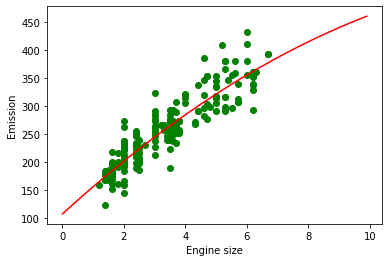

In [14]:
plt.scatter(X_test, y_test,  color='green')
XX = np.arange(0.0, 10.0, 0.1)
yy = regr.intercept_[0]+ regr.coef_[0][1]*XX+ regr.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

## Evaluation of the model

In [15]:
from sklearn.metrics import r2_score

print("R2-score: %.2f" % r2_score(y_test_poly , y_test) )

R2-score: 0.78


R-2 score indicates the percentage of the variance in the dependent variable that the independent variables explain collectively. That means that a higher R-2 score indicates better working efficiency of the model